# Mean,Median and Mode Imputation

* This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare(MCAR). We can use mode for categorical data too.
* This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns.  * It is leaking the data while training. 
* This works better if the data is linear.  

** Advantages: **

* Easy to implement(Robust to outliers) and Faster way to obtain the complete dataset.
* This is a better approach when the data size is small.
* It can prevent data loss which results in removal of the rows and columns

** Disadvantages: **

* Imputing the approximations add variance and bias.

In [59]:
#Import Libraries
import numpy as np 
import pandas as pd 

In [115]:
#Create a dummy dataset

dic = { "Rank":[ 5,  2,  8,  6,  9,  4,  7, 10,  1,  3, 20, 11, 13, 14, 16, 15, 17, 13, 18, 14],
"score":[60,80,None,5,40,70,65,None,90,None,60,80,None,16, 80, 86,88, 218, 68,285],
"First_Term":[52, 51, None, 99, 73,  7, 77, 95, 81, 39,86, 98, 91, 85, 11, 71, 52, 33, 66, 90],
"Second_Term":[61, 50,  5, None, 63, 83, 40, None, 28, 83, 40, 81, 54, 92,16, None,None,54, 52, 48],
"Third_Term":[14, 87, 49, 12, None, 16, None,None, 35, 86,None, 16, None,None, 35, 86,7, 42, 36, 59]

}

In [116]:
data = pd.DataFrame(dic)
data

,Rank,score,First_Term,Second_Term,Third_Term
0,5,60.0,52.0,61.0,14.0
1,2,80.0,51.0,50.0,87.0
2,8,NaN,NaN,5.0,49.0
3,6,5.0,99.0,NaN,12.0
4,9,40.0,73.0,63.0,NaN
5,4,70.0,7.0,83.0,16.0
6,7,65.0,77.0,40.0,NaN
7,10,NaN,95.0,NaN,NaN
8,1,90.0,81.0,28.0,35.0
9,3,NaN,39.0,83.0,86.0


# Mean

**1.Arithmetic Mean (x):**

   * The Mean of the given values is sum of all the observations divided by the total number of observations.
   * It is denoted by ${\overline{x}}$
   
   ${\overline{x}}$ = $ \frac{Sum of all the observations}{Number of observations} $
   
*Mean Tells*

* Not resistant to outliers
* Not very stable

In [117]:
#By function (For reuse)

In [118]:
def impute_nan(data,variable,mean):
    data[variable+'_mean_byfunc'] = data[variable].fillna(mean)

In [119]:
mean = data['score'].mean()
mean

86.9375

In [120]:
impute_nan(data,'score',mean)

In [121]:
data

,Rank,score,First_Term,Second_Term,Third_Term,score_mean_byfunc
0,5,60.0,52.0,61.0,14.0,60.0000
1,2,80.0,51.0,50.0,87.0,80.0000
2,8,NaN,NaN,5.0,49.0,86.9375
3,6,5.0,99.0,NaN,12.0,5.0000
4,9,40.0,73.0,63.0,NaN,40.0000
5,4,70.0,7.0,83.0,16.0,70.0000
6,7,65.0,77.0,40.0,NaN,65.0000
7,10,NaN,95.0,NaN,NaN,86.9375
8,1,90.0,81.0,28.0,35.0,90.0000
9,3,NaN,39.0,83.0,86.0,86.9375


In [122]:
#Normal

In [123]:
data['score_mean_norm'] = data['score'].fillna(data['score'].mean())
data

,Rank,score,First_Term,Second_Term,Third_Term,score_mean_byfunc,score_mean_norm
0,5,60.0,52.0,61.0,14.0,60.0000,60.0000
1,2,80.0,51.0,50.0,87.0,80.0000,80.0000
2,8,NaN,NaN,5.0,49.0,86.9375,86.9375
3,6,5.0,99.0,NaN,12.0,5.0000,5.0000
4,9,40.0,73.0,63.0,NaN,40.0000,40.0000
5,4,70.0,7.0,83.0,16.0,70.0000,70.0000
6,7,65.0,77.0,40.0,NaN,65.0000,65.0000
7,10,NaN,95.0,NaN,NaN,86.9375,86.9375
8,1,90.0,81.0,28.0,35.0,90.0000,90.0000
9,3,NaN,39.0,83.0,86.0,86.9375,86.9375


# Median

**2.Meadian (Center of the data):**

* Median is the value which occupies the middle position when all the observations are arranged in an ascending or descending order.
* It is a positional average.

* If there are odd number of values(n), take n+1 and divide by 2. Count up that many, that is the median.


* If there are even number of values(n), take n+1 and divide by 2.The number will be ending something.5. Sum number of either side of that position and divide by 2.

*Median Tells*

* The 50 Percentile of the data
* The middle rank of the data
* The Median does not care much about the ends of the data. Outliers do not bother it
* It is resistant. It is stable


In [124]:
#By function (For reuse)
def impute_nan(data,variable,median):
    data[variable+'_median_byfunc'] = data[variable].fillna(median)

median = data['score'].median()
print(median)
impute_nan(data,'score',median)
print(data)

75.0
    Rank  score  First_Term  Second_Term  Third_Term  score_mean_byfunc  \
0      5   60.0        52.0         61.0        14.0            60.0000   
1      2   80.0        51.0         50.0        87.0            80.0000   
2      8    NaN         NaN          5.0        49.0            86.9375   
3      6    5.0        99.0          NaN        12.0             5.0000   
4      9   40.0        73.0         63.0         NaN            40.0000   
5      4   70.0         7.0         83.0        16.0            70.0000   
6      7   65.0        77.0         40.0         NaN            65.0000   
7     10    NaN        95.0          NaN         NaN            86.9375   
8      1   90.0        81.0         28.0        35.0            90.0000   
9      3    NaN        39.0         83.0        86.0            86.9375   
10    20   60.0        86.0         40.0         NaN            60.0000   
11    11   80.0        98.0         81.0        16.0            80.0000   
12    13    NaN     

In [125]:
#By Normal
data['score_median_norm'] = data['score'].fillna(data['score'].median())
data

,Rank,score,First_Term,Second_Term,Third_Term,score_mean_byfunc,score_mean_norm,score_median_byfunc,score_median_norm
0,5,60.0,52.0,61.0,14.0,60.0000,60.0000,60.0,60.0
1,2,80.0,51.0,50.0,87.0,80.0000,80.0000,80.0,80.0
2,8,NaN,NaN,5.0,49.0,86.9375,86.9375,75.0,75.0
3,6,5.0,99.0,NaN,12.0,5.0000,5.0000,5.0,5.0
4,9,40.0,73.0,63.0,NaN,40.0000,40.0000,40.0,40.0
5,4,70.0,7.0,83.0,16.0,70.0000,70.0000,70.0,70.0
6,7,65.0,77.0,40.0,NaN,65.0000,65.0000,65.0,65.0
7,10,NaN,95.0,NaN,NaN,86.9375,86.9375,75.0,75.0
8,1,90.0,81.0,28.0,35.0,90.0000,90.0000,90.0,90.0
9,3,NaN,39.0,83.0,86.0,86.9375,86.9375,75.0,75.0


** Verify Mean and Median **

In [126]:
verify = data[['score','score_mean_norm','score_median_norm']]

In [127]:
verify

,score,score_mean_norm,score_median_norm
0,60.0,60.0000,60.0
1,80.0,80.0000,80.0
2,NaN,86.9375,75.0
3,5.0,5.0000,5.0
4,40.0,40.0000,40.0
5,70.0,70.0000,70.0
6,65.0,65.0000,65.0
7,NaN,86.9375,75.0
8,90.0,90.0000,90.0
9,NaN,86.9375,75.0


In [128]:
print(verify['score'].std())
print(verify['score_mean_norm'].std())
print(verify['score_median_norm'].std())

69.80398150058014
62.022465157477626
62.21564788785263


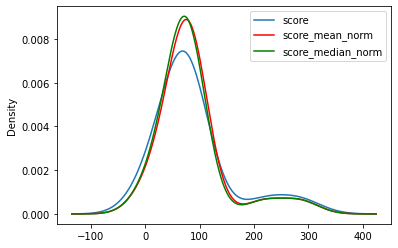

In [134]:
from matplotlib import pyplot as plt 
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
verify['score'].plot(kind='kde', ax=ax)
verify.score_mean_norm.plot(kind='kde', ax=ax, color='red')
verify.score_median_norm.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Mode

**3.Mode(Most frequent):**

* mode is the value of the variable which occurs most frequently.

*Disadvantages*

* It is possible to have no mode
* It is possible to have morethan one mode

*Mode Tells*

*  Not much
* The most 'popular' answer
* The most common result
* Not used much
* It is used for categorigal value

In [155]:
dic = {'Players': ['Messi',
  'Ronaldo',
  'Ansufati',
  'Haaland',
  'Dybala',
  'Dest',
  'Dembele',
  'Arthur',
  'FDJ',
  'Griezmann'],
 'Club': ['Barca',
  'Juv',
  None,
  'Dormund',
  'Juv',
  None,
  'Barca',
  'Juv',
  'Barca',
  'Barca']}

In [156]:
data = pd.DataFrame(dic)

In [157]:
data

,Players,Club
0,Messi,Barca
1,Ronaldo,Juv
2,Ansufati,None
3,Haaland,Dormund
4,Dybala,Juv
5,Dest,None
6,Dembele,Barca
7,Arthur,Juv
8,FDJ,Barca
9,Griezmann,Barca


In [158]:
data["Club"].mode()

0    Barca
dtype: object

In [163]:
#By Normal
data['club_mode_norm'] = data['Club'].fillna(data['Club'].mode()[0])
data

,Players,Club,club_mode_norm
0,Messi,Barca,Barca
1,Ronaldo,Juv,Juv
2,Ansufati,None,Barca
3,Haaland,Dormund,Dormund
4,Dybala,Juv,Juv
5,Dest,None,Barca
6,Dembele,Barca,Barca
7,Arthur,Juv,Juv
8,FDJ,Barca,Barca
9,Griezmann,Barca,Barca


In [165]:
#By function (For reuse)
def impute_nan(data,variable,mode):
    data[variable+'_mode_byfunc'] = data[variable].fillna(mode[0])

mode = data['Club'].mode()
print(mode)
impute_nan(data,'Club',mode)
print(data)

0    Barca
dtype: object
     Players     Club club_mode_norm Club_mode_byfunc
0      Messi    Barca          Barca            Barca
1    Ronaldo      Juv            Juv              Juv
2   Ansufati     None          Barca            Barca
3    Haaland  Dormund        Dormund          Dormund
4     Dybala      Juv            Juv              Juv
5       Dest     None          Barca            Barca
6    Dembele    Barca          Barca            Barca
7     Arthur      Juv            Juv              Juv
8        FDJ    Barca          Barca            Barca
9  Griezmann    Barca          Barca            Barca
